# **K Means Clustering**

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv(r'C:\Users\sabah computer\Downloads\pakistani_fake_data.csv')
df.head() # total data of 25 rows 

,Name,Age,Income
0,Omar,43,47941
1,Zainab,49,100493
2,Nida,20,137850
3,Iqra,24,81255
4,Nida,43,133723


Text(0, 0.5, 'Income')

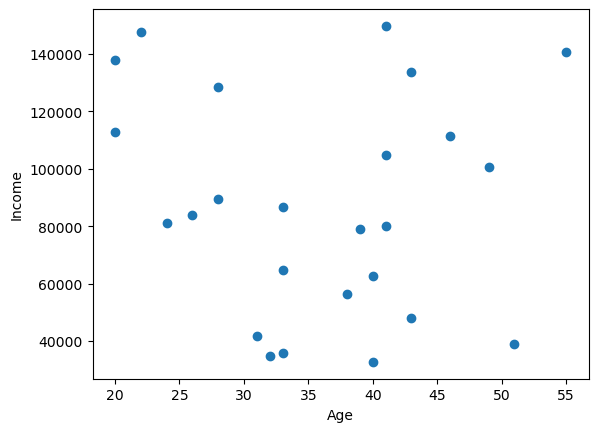

In [34]:
plt.scatter(df.Age, df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

### **Clustering Data by Age and Income using K-Means**

In [47]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

C:\Users\sabah computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2,
       0, 0, 2])

### **Specific Cluster**

In [56]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Omar,43,47941,1
1,Zainab,49,100493,2
2,Nida,20,137850,0
3,Iqra,24,81255,2
4,Nida,43,133723,0


### **Plotting**

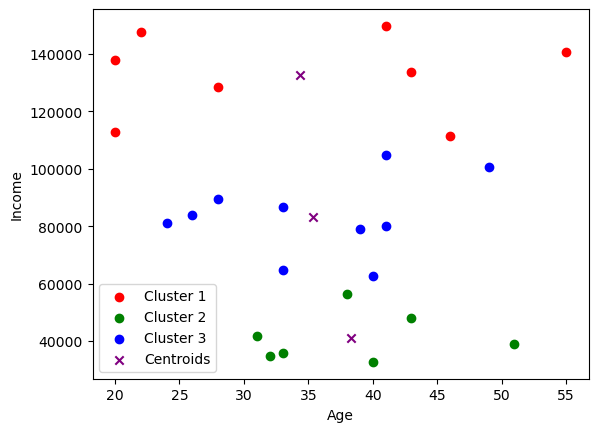

In [58]:
# Plot clusters
plt.scatter(df.Age[df.cluster == 0], df.Income[df.cluster == 0], color='red', label='Cluster 1')
plt.scatter(df.Age[df.cluster == 1], df.Income[df.cluster == 1], color='green', label='Cluster 2')
plt.scatter(df.Age[df.cluster == 2], df.Income[df.cluster == 2], color='blue', label='Cluster 3')

# Plot cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='x', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

plt.show()

In [60]:
km.cluster_centers_

array([[3.43750000e+01, 1.32794000e+05],
       [3.82857143e+01, 4.10717143e+04],
       [3.54000000e+01, 8.32691000e+04]])

### **Elbow Technique**

In [76]:
sse

[35192586336.64,
 9245268559.566666,
 3119630084.7111106,
 1527580244.1488097,
 736832473.5833334,
 491685719.9166667,
 505261416.3333334,
 336593958.8333333,
 250128688.6666667]

In [70]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

[35192586336.64,
 9245268559.566666,
 3119630084.7111106,
 1527580244.1488097,
 736832473.5833334,
 672019358.75,
 382221868.9166667,
 268212376.6666667,
 204557677.25]

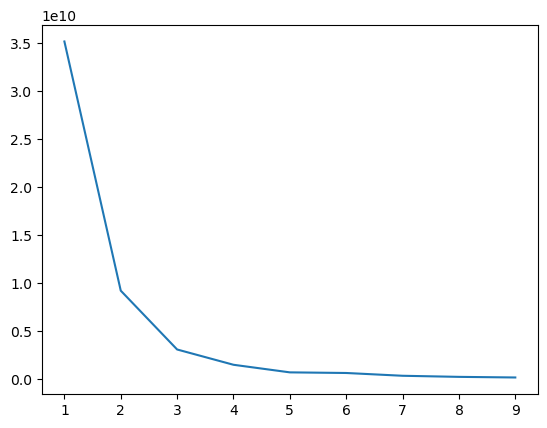

In [72]:
plt.plot(k_rng, sse)